# S12T02 - Tasca de web scraping
Aprèn a realitzar web scraping.

## - Exercici 1
Realitza web scraping d'una pàgina de la borsa de Madrid (https://www.bolsamadrid.es) utilitzant BeautifulSoup i Selenium.
<br><br><font color='blue'>The script will use <b>BeautifulSoup</b> to read static information of the website, in particular the list of companies that are displayed in the 'List of companies' page:

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import requests
from bs4 import BeautifulSoup
import time

#save url
URL = "https://www.bolsamadrid.es/esp/aspx/Empresas/Empresas.aspx"
page = requests.get(URL)

#instantiate BS
soup = BeautifulSoup(page.content, 'html.parser')
time.sleep(3)

#locate the table with all the companies
cies = soup.find("table", class_="TblPort")

#make a list of all the companies in the table
cies_elements = cies.findChildren("tr", recursive=True)

#extract details from each company and print
for c in cies_elements:
    try:
        name = c.find("a")
        print(name.text.strip())
        sector = c.find_all("td")
        print(sector[1].text.strip())
        link = c.find("a", href=True)
        print("https://www.bolsamadrid.es"+link['href'])
        print()
    except:
        continue

page.close()

2022-04-23 15:12:04 [urllib3.connectionpool] DEBUG: Starting new HTTPS connection (1): www.bolsamadrid.es:443
2022-04-23 15:12:05 [urllib3.connectionpool] DEBUG: https://www.bolsamadrid.es:443 "GET /esp/aspx/Empresas/Empresas.aspx HTTP/1.1" 200 11356


ABENGOA, S.A.
Mat.Basicos, Industria y Construcción - Ingeniería y Otros
https://www.bolsamadrid.es/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105200002

ACCIONA,S.A.
Mat.Basicos, Industria y Construcción - Construcción
https://www.bolsamadrid.es/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0125220311

ACERINOX, S.A.
Mat.Basicos, Industria y Construcción - Mineral, Metales y Transformación
https://www.bolsamadrid.es/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0132105018

ACS,ACTIVIDADES DE CONST.Y SERVICIOS S.A
Mat.Basicos, Industria y Construcción - Construcción
https://www.bolsamadrid.es/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0167050915

ADOLFO DOMINGUEZ, S.A.
Bienes de Consumo - Textil, Vestido y Calzado
https://www.bolsamadrid.es/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0106000013

AEDAS HOMES, S.A.
Servicios Inmobiliarios - Inmobiliarias y Otros
https://www.bolsamadrid.es/esp/aspx/Empresas/FichaValor.aspx?ISIN=ES0105287009

AENA, S.M.E., S.A.
Servicios de Consumo - Transporte y Distribu

<font color='blue'>Now we'll use Selenium to interact a bit more with the website. We'll click on the button that takes us to the main page. There we'll click in 'Shares' and download data about the companies.

In [24]:
from selenium.webdriver import Chrome
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
import time

#accessing the website
opts = Options()
opts.headless = True
browser = Chrome(options=opts)
browser.get(URL)
time.sleep(2)

#clicking 'home' button 
browser.find_element_by_class_name('BaseMenu').click()   
time.sleep(2)

2022-04-23 15:12:08 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:60350/session {"capabilities": {"firstMatch": [{}], "alwaysMatch": {"browserName": "chrome", "platformName": "any", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--disable-gpu"]}}}, "desiredCapabilities": {"browserName": "chrome", "version": "", "platform": "ANY", "goog:chromeOptions": {"extensions": [], "args": ["--headless", "--disable-gpu"]}}}
2022-04-23 15:12:08 [urllib3.connectionpool] DEBUG: Starting new HTTP connection (1): 127.0.0.1:60350
2022-04-23 15:12:09 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "POST /session HTTP/1.1" 200 794
2022-04-23 15:12:09 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:09 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/url {"url": "https://www.bolsamadrid.es/esp/aspx/Empresas/Empresas.aspx"}
2022-04-23 15:12:13 [

In [25]:
#clicking 'Acciones' button
element = browser.find_elements_by_link_text('Acciones')
element[0].click()

2022-04-23 15:12:17 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/elements {"using": "link text", "value": "Acciones"}
2022-04-23 15:12:17 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "POST /session/8463ee4dd5cf18338035a2beb98e4560/elements HTTP/1.1" 200 169
2022-04-23 15:12:17 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:17 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/01412cc3-567d-4334-8b74-ead0e1969b1b/click {"id": "01412cc3-567d-4334-8b74-ead0e1969b1b"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "POST /session/8463ee4dd5cf18338035a2beb98e4560/element/01412cc3-567d-4334-8b74-ead0e1969b1b/click HTTP/1.1" 200 14
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request


In [26]:
#parsing all the data in the main table (shares)
element = browser.find_element_by_tag_name('tbody')
cies = element.find_element_by_id('ctl00_Contenido_tblAcciones')
cies_element = cies.find_element_by_tag_name('tbody')
cies_elements = cies_element.find_elements_by_tag_name('th')

columns = []
for c in cies_elements:
    columns.append(c.text)

columns

2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element {"using": "css selector", "value": "tbody"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "POST /session/8463ee4dd5cf18338035a2beb98e4560/element HTTP/1.1" 200 88
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/470efe61-c4e7-4021-ab89-1bd4dbc43bbe/element {"using": "css selector", "value": "[id=\"ctl00_Contenido_tblAcciones\"]", "id": "470efe61-c4e7-4021-ab89-1bd4dbc43bbe"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "POST /session/8463ee4dd5cf18338035a2beb98e4560/element/470efe61-c4e7-4021-ab89-1bd4dbc43bbe/element HTTP/1.1" 200 88
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_conne

['Nombre',
 'Últ.',
 '% Dif.',
 'Máx.',
 'Mín.',
 'Volumen',
 'Efectivo (miles €)',
 'Fecha',
 'Hora']

<font color='blue'>We'll save the data in a pandas dataFrame:

In [27]:
import pandas as pd

results = []
for c in cies_element.find_elements_by_tag_name('td'):
    results.append(c.text)    

data = {}
for i in range(9):
    data[columns[i]]=results[i::9]

browser.close()

df = pd.DataFrame(data)   
df

2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: POST http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/f89d42ed-e83d-4dae-8df7-04024daff8c1/elements {"using": "css selector", "value": "td", "id": "f89d42ed-e83d-4dae-8df7-04024daff8c1"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "POST /session/8463ee4dd5cf18338035a2beb98e4560/element/f89d42ed-e83d-4dae-8df7-04024daff8c1/elements HTTP/1.1" 200 24896
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/9c10ef35-bf5b-46e2-9797-a76729072c08/text {"id": "9c10ef35-bf5b-46e2-9797-a76729072c08"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/9c10ef35-bf5b-46e2-9797-a76729072c08/text HTTP/1.1" 200 19
202

2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/b9fa9a3b-e438-4cd2-9674-31584974cf4a/text {"id": "b9fa9a3b-e438-4cd2-9674-31584974cf4a"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/b9fa9a3b-e438-4cd2-9674-31584974cf4a/text HTTP/1.1" 200 21
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/1b937506-4e73-4a0e-bbe4-e1cc418ac73f/text {"id": "1b937506-4e73-4a0e-bbe4-e1cc418ac73f"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/1b937506-4e73-4a0e-bbe4-e

2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/16dd9437-d212-4fdf-9f91-80a1602424cc/text {"id": "16dd9437-d212-4fdf-9f91-80a1602424cc"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/16dd9437-d212-4fdf-9f91-80a1602424cc/text HTTP/1.1" 200 20
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:18 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/24a7c0c6-8c35-4944-a529-d3fc7672b7a8/text {"id": "24a7c0c6-8c35-4944-a529-d3fc7672b7a8"}
2022-04-23 15:12:18 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/24a7c0c6-8c35-4944-a529-d

2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/2b9b06a3-75f9-47fa-9607-4508a43d9296/text {"id": "2b9b06a3-75f9-47fa-9607-4508a43d9296"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/2b9b06a3-75f9-47fa-9607-4508a43d9296/text HTTP/1.1" 200 17
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/58fdafd4-59e7-49d8-84df-e0e9a710a779/text {"id": "58fdafd4-59e7-49d8-84df-e0e9a710a779"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/58fdafd4-59e7-49d8-84df-e

2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/d698a8be-c9c6-4484-94fb-4a22df7113a2/text {"id": "d698a8be-c9c6-4484-94fb-4a22df7113a2"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/d698a8be-c9c6-4484-94fb-4a22df7113a2/text HTTP/1.1" 200 23
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/cc3cae9c-4c9a-41e7-aa24-7a63241317ab/text {"id": "cc3cae9c-4c9a-41e7-aa24-7a63241317ab"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/cc3cae9c-4c9a-41e7-aa24-7

2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/f22eca83-5177-4e1a-a48f-d7d74179c49a/text {"id": "f22eca83-5177-4e1a-a48f-d7d74179c49a"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/f22eca83-5177-4e1a-a48f-d7d74179c49a/text HTTP/1.1" 200 22
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/d4dfce43-a21c-444e-916b-c5f577cb2a2d/text {"id": "d4dfce43-a21c-444e-916b-c5f577cb2a2d"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/d4dfce43-a21c-444e-916b-c

2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/22c3322d-2988-454e-bc3b-e54e8e4066fb/text {"id": "22c3322d-2988-454e-bc3b-e54e8e4066fb"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/22c3322d-2988-454e-bc3b-e54e8e4066fb/text HTTP/1.1" 200 22
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/1ff5449c-63fd-43b8-8601-17dd32a14847/text {"id": "1ff5449c-63fd-43b8-8601-17dd32a14847"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/1ff5449c-63fd-43b8-8601-1

2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/79f11e76-fc55-4ebc-b8f3-b5a1427c8019/text {"id": "79f11e76-fc55-4ebc-b8f3-b5a1427c8019"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/79f11e76-fc55-4ebc-b8f3-b5a1427c8019/text HTTP/1.1" 200 19
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:19 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/232c3cd8-f83c-4f78-89be-0886433a6da1/text {"id": "232c3cd8-f83c-4f78-89be-0886433a6da1"}
2022-04-23 15:12:19 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/232c3cd8-f83c-4f78-89be-0

2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/e65b7f26-b3eb-4995-b805-edbd66692404/text {"id": "e65b7f26-b3eb-4995-b805-edbd66692404"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/e65b7f26-b3eb-4995-b805-edbd66692404/text HTTP/1.1" 200 19
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/5b9e55ad-a302-44e6-8a19-faa5b23745d0/text {"id": "5b9e55ad-a302-44e6-8a19-faa5b23745d0"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/5b9e55ad-a302-44e6-8a19-f

2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/8a8335c8-f158-49bb-9467-a34ae9132207/text {"id": "8a8335c8-f158-49bb-9467-a34ae9132207"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/8a8335c8-f158-49bb-9467-a34ae9132207/text HTTP/1.1" 200 18
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/78a792ad-35dc-47bd-bd35-380e2974764e/text {"id": "78a792ad-35dc-47bd-bd35-380e2974764e"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/78a792ad-35dc-47bd-bd35-3

2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/8f7ab8ff-63bf-4246-9202-b8b91338a6be/text {"id": "8f7ab8ff-63bf-4246-9202-b8b91338a6be"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/8f7ab8ff-63bf-4246-9202-b8b91338a6be/text HTTP/1.1" 200 20
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/627c158b-3f9b-453e-b163-5b3d9b7ac410/text {"id": "627c158b-3f9b-453e-b163-5b3d9b7ac410"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/627c158b-3f9b-453e-b163-5

2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/0bed1e26-58e1-4c8e-a196-88da05530ade/text {"id": "0bed1e26-58e1-4c8e-a196-88da05530ade"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/0bed1e26-58e1-4c8e-a196-88da05530ade/text HTTP/1.1" 200 18
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:20 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/4be4338b-dd7d-4b10-834c-687c47d12734/text {"id": "4be4338b-dd7d-4b10-834c-687c47d12734"}
2022-04-23 15:12:20 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/4be4338b-dd7d-4b10-834c-6

2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/03720592-f49d-4c81-ba73-ee8120c2e075/text {"id": "03720592-f49d-4c81-ba73-ee8120c2e075"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/03720592-f49d-4c81-ba73-ee8120c2e075/text HTTP/1.1" 200 17
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/77870466-48ab-4ce4-acc6-f852970ab289/text {"id": "77870466-48ab-4ce4-acc6-f852970ab289"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/77870466-48ab-4ce4-acc6-f

2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/27b10ab8-6302-445d-b259-a537ca032626/text {"id": "27b10ab8-6302-445d-b259-a537ca032626"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/27b10ab8-6302-445d-b259-a537ca032626/text HTTP/1.1" 200 24
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/1f1fa518-a6e4-4043-81e4-cd24c57a6b17/text {"id": "1f1fa518-a6e4-4043-81e4-cd24c57a6b17"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/1f1fa518-a6e4-4043-81e4-c

2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/92016b65-33c9-4e5c-9b16-e3d237977cee/text {"id": "92016b65-33c9-4e5c-9b16-e3d237977cee"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/92016b65-33c9-4e5c-9b16-e3d237977cee/text HTTP/1.1" 200 22
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/42d08ac9-0965-4708-853a-04701f3e1e73/text {"id": "42d08ac9-0965-4708-853a-04701f3e1e73"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/42d08ac9-0965-4708-853a-0

2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/cd03f4fc-5857-4c11-a23c-83fc5320ee4f/text {"id": "cd03f4fc-5857-4c11-a23c-83fc5320ee4f"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/cd03f4fc-5857-4c11-a23c-83fc5320ee4f/text HTTP/1.1" 200 21
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/81ae16ad-1ad1-4239-94e3-fc424a128c7e/text {"id": "81ae16ad-1ad1-4239-94e3-fc424a128c7e"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/81ae16ad-1ad1-4239-94e3-f

2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/2a5d9c77-8b87-4342-b96a-62c0a26961c7/text {"id": "2a5d9c77-8b87-4342-b96a-62c0a26961c7"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/2a5d9c77-8b87-4342-b96a-62c0a26961c7/text HTTP/1.1" 200 19
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:21 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/d3762276-d8ff-41b9-b99b-92e0f721ae5d/text {"id": "d3762276-d8ff-41b9-b99b-92e0f721ae5d"}
2022-04-23 15:12:21 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/d3762276-d8ff-41b9-b99b-9

2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/174f78c0-8bbf-41f7-af9b-0c081c82425b/text {"id": "174f78c0-8bbf-41f7-af9b-0c081c82425b"}
2022-04-23 15:12:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/174f78c0-8bbf-41f7-af9b-0c081c82425b/text HTTP/1.1" 200 19
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/643e940b-906d-4594-a9c1-54d0bb825fde/text {"id": "643e940b-906d-4594-a9c1-54d0bb825fde"}
2022-04-23 15:12:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/643e940b-906d-4594-a9c1-5

2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/c35b38eb-060c-4d55-a7d5-4bb05a9c5a05/text {"id": "c35b38eb-060c-4d55-a7d5-4bb05a9c5a05"}
2022-04-23 15:12:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/c35b38eb-060c-4d55-a7d5-4bb05a9c5a05/text HTTP/1.1" 200 18
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/7101c814-69ff-40a7-bd9d-c9952393c6cb/text {"id": "7101c814-69ff-40a7-bd9d-c9952393c6cb"}
2022-04-23 15:12:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/7101c814-69ff-40a7-bd9d-c

2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/0ba19174-61af-4d4f-87e1-22edf292fdc6/text {"id": "0ba19174-61af-4d4f-87e1-22edf292fdc6"}
2022-04-23 15:12:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/0ba19174-61af-4d4f-87e1-22edf292fdc6/text HTTP/1.1" 200 21
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: Finished Request
2022-04-23 15:12:22 [selenium.webdriver.remote.remote_connection] DEBUG: GET http://127.0.0.1:60350/session/8463ee4dd5cf18338035a2beb98e4560/element/75295c5e-e73f-4d55-ae23-30e98eb72a4e/text {"id": "75295c5e-e73f-4d55-ae23-30e98eb72a4e"}
2022-04-23 15:12:22 [urllib3.connectionpool] DEBUG: http://127.0.0.1:60350 "GET /session/8463ee4dd5cf18338035a2beb98e4560/element/75295c5e-e73f-4d55-ae23-3

,Nombre,Últ.,% Dif.,Máx.,Mín.,Volumen,Efectivo (miles €),Fecha,Hora
0,ACCIONA,"188,8000","-1,36","192,8000","188,8000",103.822,"19.760,55",22/04/2022,Cierre
1,ACERINOX,"9,9240","-3,04","10,1900","9,9240",1.166.899,"11.702,99",22/04/2022,Cierre
2,ACS,"24,5600","-1,64","24,9200","24,5600",2.428.277,"59.959,75",22/04/2022,Cierre
3,AENA,"148,8500","-1,39","152,2500","148,4000",94.942,"14.181,31",22/04/2022,Cierre
4,ALMIRALL,"11,9600","-1,08","12,1000","11,8800",288.129,"3.451,38",22/04/2022,Cierre
5,AMADEUS,"59,1200","-1,79","60,5600","59,0000",657.143,"39.034,18",22/04/2022,Cierre
6,ARCELORMIT.,"29,5500","-4,06","30,4950","29,5500",596.470,"17.883,38",22/04/2022,Cierre
7,B.SANTANDER,"3,1660","-1,98","3,2400","3,1660",38.807.351,"123.626,41",22/04/2022,Cierre
8,BA.SABADELL,"0,7806","-2,62","0,8196","0,7790",38.607.508,"30.713,71",22/04/2022,Cierre
9,BANKINTER,"5,5700","-0,57","5,7660","5,5320",3.499.578,"19.752,82",22/04/2022,Cierre


## - Exercici 2
Documenta en un word el teu conjunt de dades generat amb la informació que tenen els diferents arxius de Kaggle.

In [28]:
#saving dataframe in a word file
import docx

doc = docx.Document()
t = doc.add_table(df.shape[0]+1, df.shape[1])
t.style = 'Table Grid'

for j in range(df.shape[-1]):
    t.cell(0,j).text = df.columns[j]
    
for i in range(df.shape[0]):
    for j in range(df.shape[-1]):
        t.cell(i+1,j).text = str(df.values[i,j])
        
doc.save("ibex35.docx")

<font color='blue'>The results have been saved in a Word file that will follow this notebook, which looks as follows:

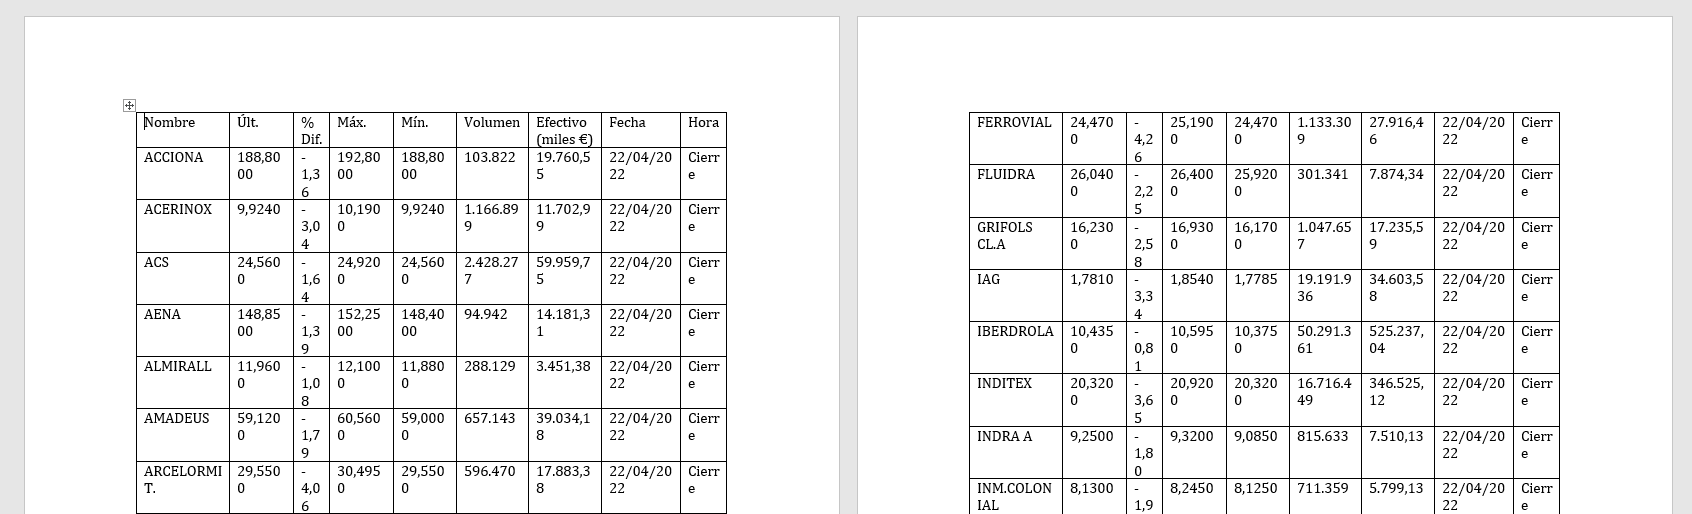

## - Exercici 3
Tria una página web que tu vulguis i realitza web scraping mitjançant la llibreria Scrapy. 

<font color='blue'>For this exercise we've chosen a simple website that gathers data about which festivity is celebrated each day of the year (https://onu.org.gt/fechas-onu/dias-internacionales/). We'll use <b>Scrapy</b> to detect the HTML code of each date and the title of the festivity, and yield them in a table that will be saved in a CSV file.

In [180]:
import scrapy
from scrapy.crawler import CrawlerProcess


#stop previous reactor run, if there was any (otherwise it gives back an error)
import sys
if 'twisted.internet.reactor' in sys.modules:
	del sys.modules['twisted.internet.reactor']

#creation of the spider
class DaysSpider(scrapy.Spider):
    name = 'days'
    start_urls = ['https://onu.org.gt/fechas-onu/dias-internacionales/']
    
    custom_settings = {
        'FEED_URI': 'days.csv',
        'FEED_FORMAT': 'csv'    
    }
    
    def parse(self, response):
        events = []
        for event in response.css('p'):
            events.append(event.css('a::text').get())
        
        days = response.css('h4::text').extract()
        
        i=0
        for d in days:
            yield{
                'days': days[i],
                'events': events[i+1]
            }
            print(days[i], "\t", events[i+1])
            i+=1
        
    
#saving and running spider   
process = CrawlerProcess()
process.crawl(DaysSpider)
process.start()

2022-04-24 21:56:04 [scrapy.utils.log] INFO: Scrapy 2.6.1 started (bot: scrapybot)
2022-04-24 21:56:04 [scrapy.utils.log] INFO: Versions: lxml 4.6.3.0, libxml2 2.9.10, cssselect 1.1.0, parsel 1.6.0, w3lib 1.21.0, Twisted 22.2.0, Python 3.8.8 (default, Apr 13 2021, 15:08:03) [MSC v.1916 64 bit (AMD64)], pyOpenSSL 20.0.1 (OpenSSL 1.1.1n  15 Mar 2022), cryptography 3.4.7, Platform Windows-10-10.0.19041-SP0
2022-04-24 21:56:04 [scrapy.crawler] INFO: Overridden settings:
{}
2022-04-24 21:56:04 [scrapy.utils.log] DEBUG: Using reactor: twisted.internet.selectreactor.SelectReactor
2022-04-24 21:56:04 [scrapy.extensions.telnet] INFO: Telnet Password: 2b508c2aebb08a58
2022-04-24 21:56:04 [scrapy.middleware] INFO: Enabled extensions:
['scrapy.extensions.corestats.CoreStats',
 'scrapy.extensions.telnet.TelnetConsole',
 'scrapy.extensions.feedexport.FeedExporter',
 'scrapy.extensions.logstats.LogStats']
2022-04-24 21:56:04 [scrapy.middleware] INFO: Enabled downloader middlewares:
['scrapy.downloade

2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '6 de abril', 'events': 'Día internacional del deporte para el desarrollo y la paz'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '7 de abril', 'events': 'Día mundial de la salud'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '7 de abril', 'events': 'Día internacional de reflexión sobre el genocidio cometido en Rwanda'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '12 de abril', 'events': 'Día internacional de los vuelos espaciales tripulados'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '19 de abril', 'events': 'Día de la lengu

2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '19 de junio', 'events': 'Día internacional de las remesas familiares'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '20 de junio', 'events': 'Día mundial de lucha contra la desertificación'}


4 de enero 	 Día mundial del Braille
24 de enero 	 Día internacional de la educación
27 de enero 	 Día internacional de conmemoración anual en memoria de las víctimas del Holocausto
4 de febrero 	 Día mundial contra el Cáncer
6 de febrero 	 Día internacional de tolerancia cero con la mutilación genital femenina
10 de febrero 	 Día mundial de las legumbres
11 de febrero 	 Día internacional de la mujer y la niña en la ciencia
13 de febrero 	 Día mundial de la radio
20 de febrero 	 Día mundial de la justicia social
21 de febrero 	 Día internacional de la lengua materna
1 de marzo 	 Día contra la Discriminación
3 de marzo 	 Día mundial de la vida silvestre
8 de marzo 	 Día internacional de la mujer
20 de marzo 	 Día de la lengua francesa
20 de marzo 	 Día internacional de la felicidad
21 de marzo 	 Día internacional de la eliminación de la discriminación racial
21 de marzo 	 Día mundial de la poesía
21 de marzo 	 Día internacional del Nowruz
21 de marzo 	 Día mundial del Síndrome de Down
2

2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '21 de junio', 'events': 'Día de la gastronomía sostenible'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '23 de junio', 'events': 'Día internacional para la eliminación de la violencia sexual en los conflictos'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '25 de junio', 'events': 'Día mundial de los refugiados'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '26 de junio', 'events': 'Día internacional del yoga'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '27 de junio', 'events': 'Día de las Naciones Unidas para la administració

2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '24 de octubre', 'events': 'Día mundial de los docentes'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '27 de octubre', 'events': 'Día mundial del correo'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '31 de octubre', 'events': 'Día mundial de la salud mental'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '2 de noviembre', 'events': 'Día internacional de la niña'}
2022-04-24 21:56:05 [scrapy.core.scraper] DEBUG: Scraped from <200 https://onu.org.gt/fechas-onu/dias-internacionales/>
{'days': '5 de noviembre', 'events': 'Día internacional para la reducción de los desastres'}
2022-04-24 21:56:05 [scrapy.core.scrape

 	 Día mundial de lucha contra la desertificación
21 de junio 	 Día de la gastronomía sostenible
23 de junio 	 Día internacional para la eliminación de la violencia sexual en los conflictos
25 de junio 	 Día mundial de los refugiados
26 de junio 	 Día internacional del yoga
27 de junio 	 Día de las Naciones Unidas para la administración pública
29 de junio 	 Día internacional de las viudas
30 de junio 	 Día de la gente de mar
6 de julio 	 Día internacional de la lucha contra el uso indebido y el tráfico ilícito de drogas
11 de julio 	 Día de las microempresas y las pequeñas  y medianas empresas
15 de julio 	 Día internacional de los trópicos
18 de julio 	 Día internacional de los asteroides
28 de julio 	 Día internacional del parlamentarismo
30 de julio 	 Día internacional de las cooperativas
9 de agosto 	 Día mundial de la población
12 de agosto 	 Día mundial de las habilidades de la juventud
19 de agosto 	 Día Internacional de Nelson Mandela
21 de agosto 	 Día mundial contra la Hepat

<font color='blue'>Although the website is very simple, the parsing process hasn't been easy, since each day of the year is not independently saved in a capsule gathering the date and title of the festivity. Instead, the days and titles are scattered homogeneously across the page, meaning we couldn't use Scrapy with a loop as usual. Rather, we've saved all the dates in a list, all the titles in another list, and then yielded each pair accordingly. <br><br>The results have been saved in a CSV file that will follow this notebook, and looks like this:

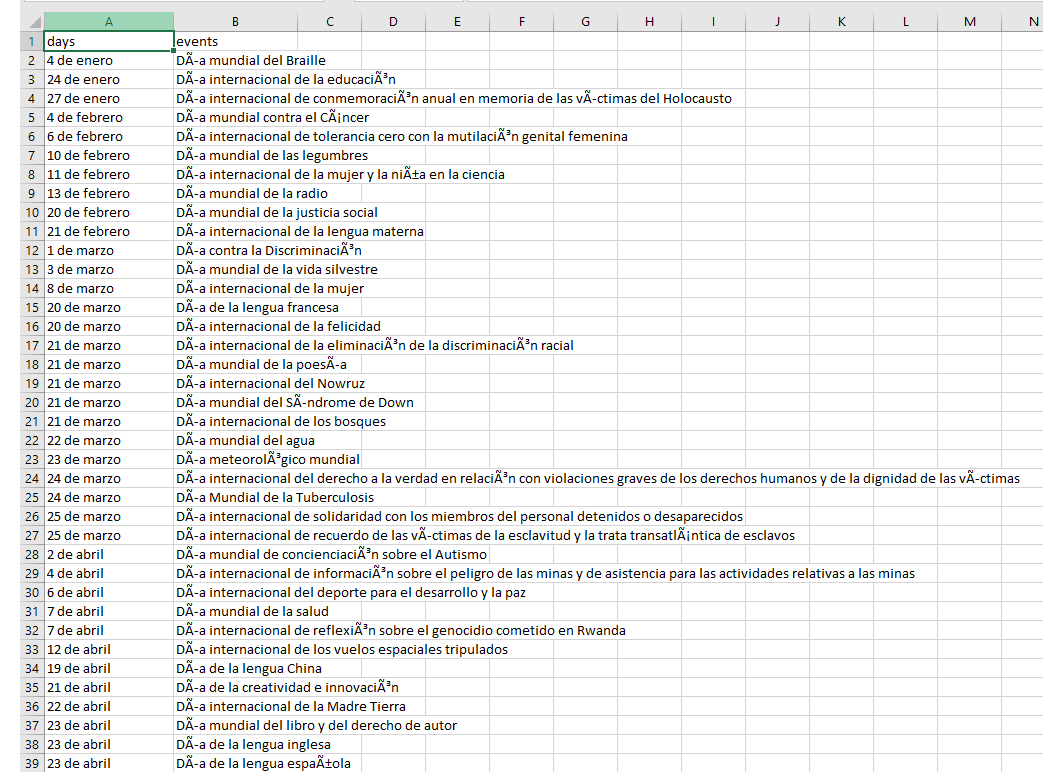